# **Predicting Potential Customers (Decision Trees and Random Forest)**

## **Importing the necessary libraries and overview of the dataset**

In [2]:
# import warnings
import warnings 
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the dataset**

In [6]:
data = pd.read_csv("C:/Users/PishroPardaz/Desktop/AI in innovation/HW_Proposal/XonLearn.csv")

### **View the first and the last 5 rows of the dataset**

In [7]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### **Understand the shape of the dataset**

In [9]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

### **Check the data types of the columns in the dataset**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.
    * Will have to create dummy encoding for object columns for the model
* There are **no null values** in the dataset.

In [11]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **summary statistics**

In [12]:
numerical_col = data.select_dtypes('number').columns

data[numerical_col] .describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
* `age` - Average age for those in EdTech is 46 with the youngest being 18 and the oldest being 63. With over 75% being over 36 years old. 
* `website_visits` - Average number of visits is 3.5. There is a large gap between 75th percentile and max indicating there could be an outlier. 
* `time_spent_on_website` - Time spent ranges from 0-2537s (0-42min).
* `page_views_per_visit` - Average page views is 3. There is a large gap between 75th percentile and max indicating there could be an outlier, or a very pracousious lead. 
* `status` - Over 75% of the leads where not converted indicating.

#### **categorical variables**

In [13]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with XonLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [12]:
# Checking the number of unique values
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [13]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

#### Status Of Leads

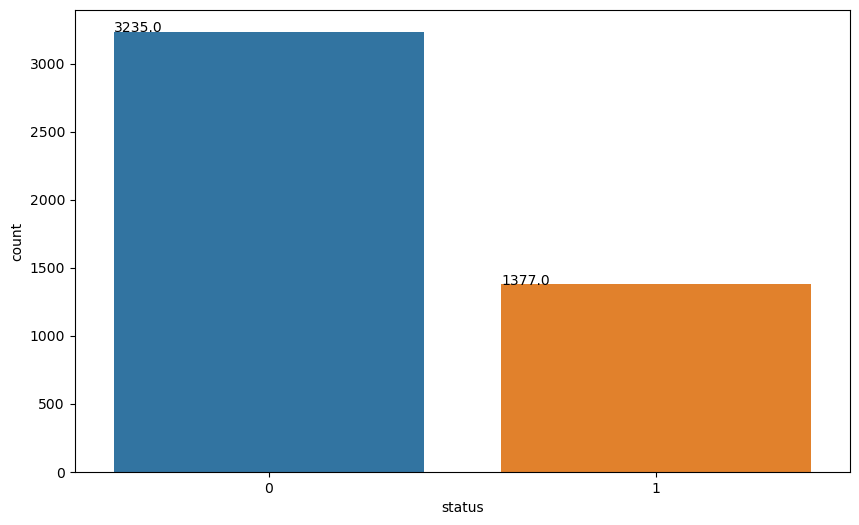

In [17]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

#### **Vizualizing Features**

age
Skew : -0.72


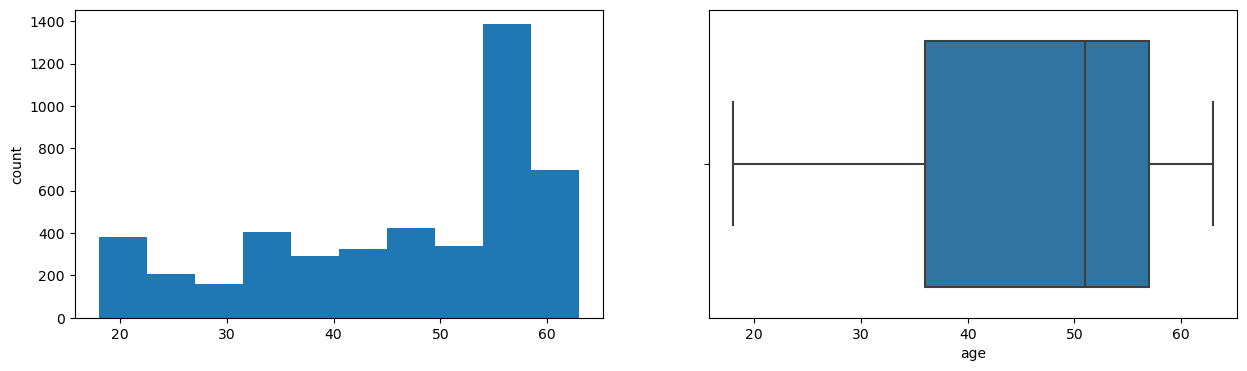

website_visits
Skew : 2.16


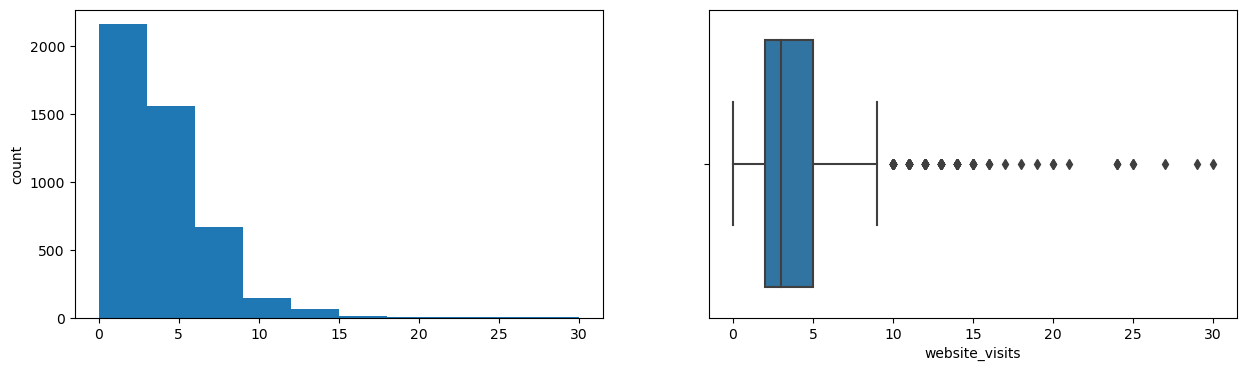

time_spent_on_website
Skew : 0.95


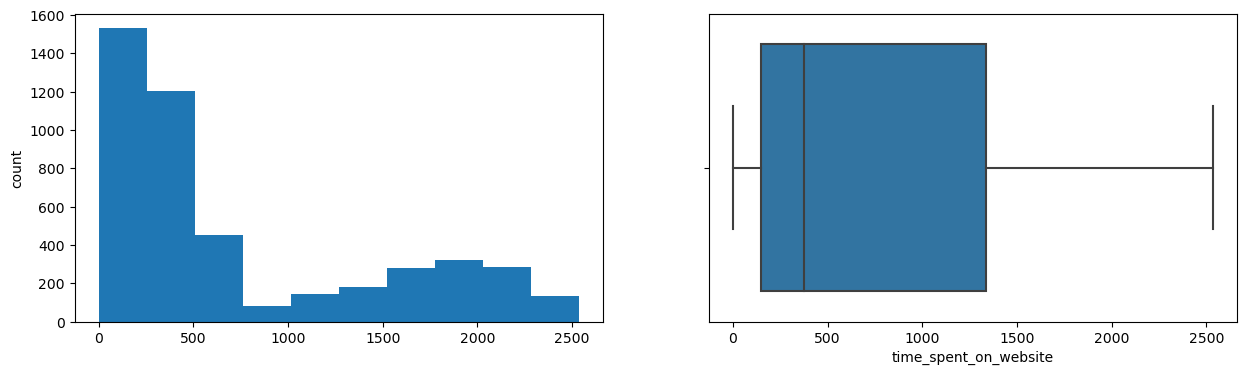

page_views_per_visit
Skew : 1.27


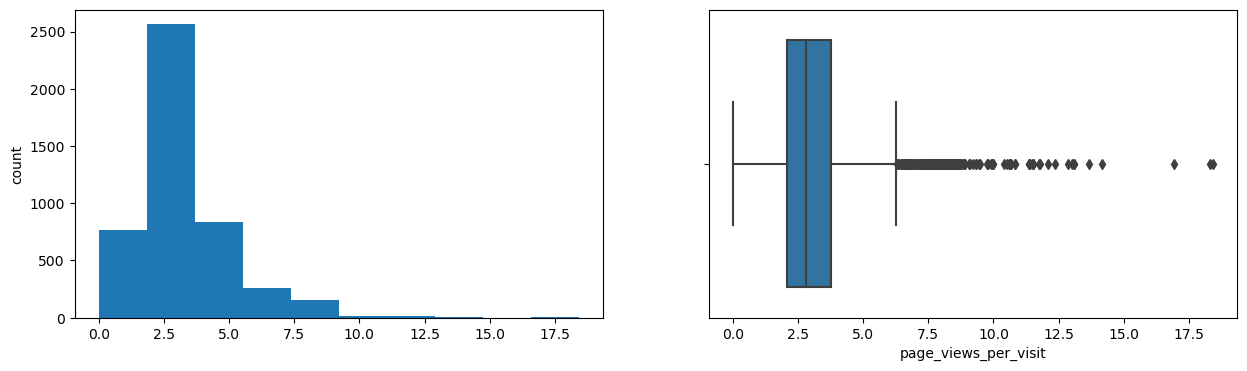

In [21]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**
* `age` - The age of leads are **left skewed** with most falling between the ages of 55-60. There are a uniform number of leads from 20-55 years old. 
* `website_visits` - Website visits are **heavily right skewed** with many leads never having visited the website. There are a number of **outliers** past the 75th percentile of 7.5 website visits. 
* `time_spent_on_website` - Time spent on the web site is **right skewed** with man leads spending no time on the website. There seemes to be a second small normal distribution of leads centered around 1750s. Perhaps indicating there are 2 groups of leads, one that spends little or no time on the website, and a second that uses the website as a primary source of information.
* `page_views_per_visit` - Page views is **right skewed** with a majority of leads viewing 2-4 pages of the website. There are a number of **outliers** past the 75th percentile.

### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

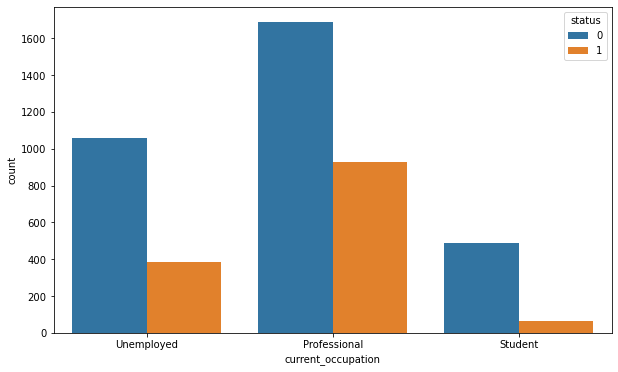

In [16]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this.**

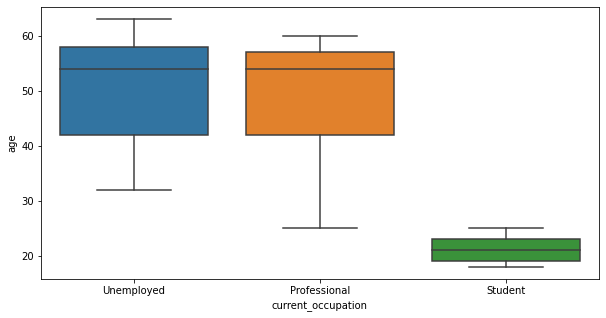

In [17]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["current_occupation"], data["age"])

plt.show()

In [18]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads.**

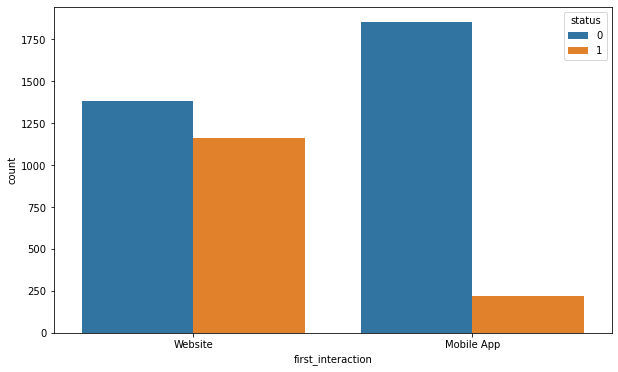

In [19]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

**Lets see how time spent on the website impacts status**

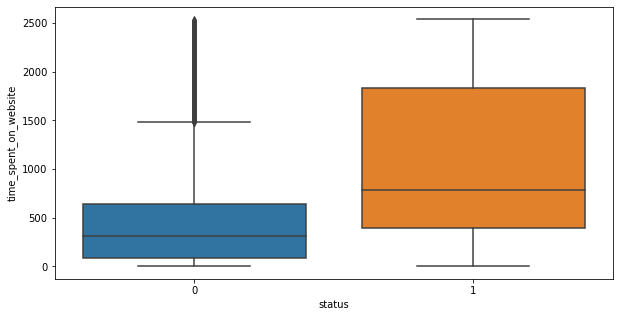

In [20]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["status"], data["time_spent_on_website"])

plt.show()

**Observations:**
* Time spent on the the website has a very possitive effect with leads that have converted. 
* This is perhaps because those who spend more time on the website are more interested or that the website itself gives a positive perseption.

**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead coversion**

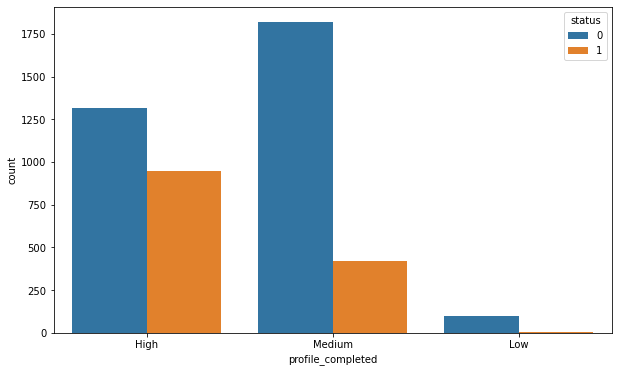

In [21]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

### **Correlation heatmap**

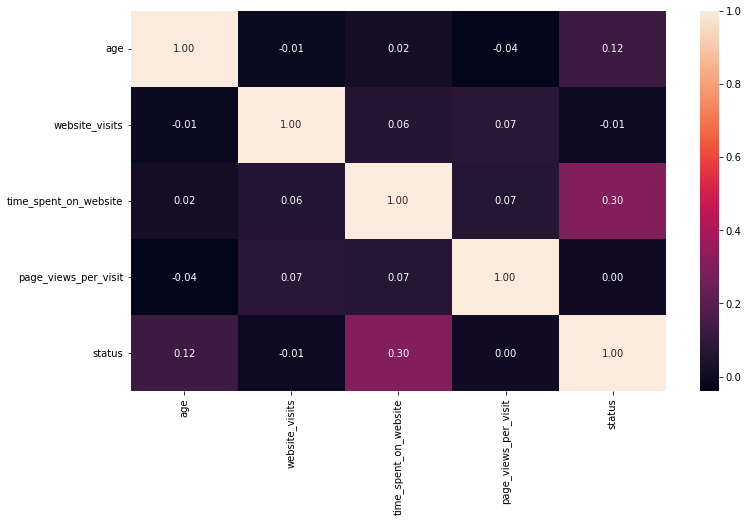

In [24]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

**Observations:**
* The highest correlation is possitve between **time spent on website and status, our key outcome.** 
* Oddly there is a weak negative correlation between website visists and status, perhaps indicating that those who spend a long time on the website are very interested, where those who have repeat visits are uncertain.  
* Most other data seems to have a fairly neutral correlations. 

## **Data preparation for modeling**

- We want to predict which lead is more likely to be converted.

### **Encoding**
**Before we proceed to build a model, we'll have to encode categorical features.**
- We'll split the data into train and test sets to be able to evaluate the model that we build on the train data.

In [24]:
# Separating the target variable and other variables
X = data.drop(columns = 'status') #make a copy called X which is a dataframe with "booking_status" removed

Y = data['status'] #Y is a series (column) containing the "booking_status" 

In [25]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

#pd.get_dummies => working on X dataframe converts all cathegorical variables into binary 1/0 yes/no.

In [26]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [27]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 4627)
Shape of the test set:  (1384, 4627)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. 

#### **Which case is more important?** 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

#### **How to reduce the losses?**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing **False Negatives**. 
* In this case the false negative is **predicting a lead will not convert(0), when it would have converted(1)**

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [30]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree - Base Model**

In [31]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state =7)

d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



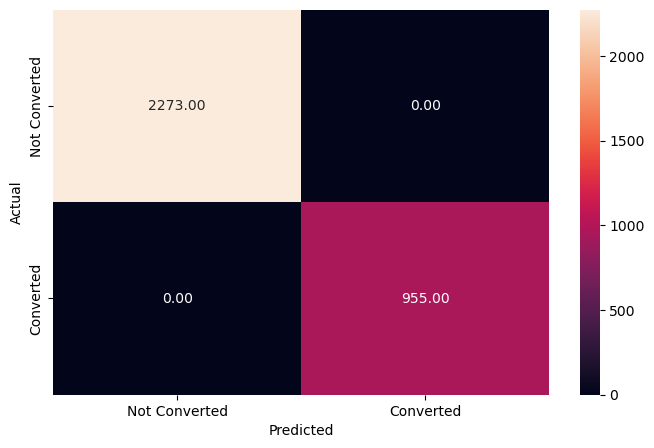

In [32]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
The model this perfectly on the training data, it is likely overfitted.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       962
           1       0.74      0.71      0.72       422

    accuracy                           0.83      1384
   macro avg       0.81      0.80      0.80      1384
weighted avg       0.83      0.83      0.83      1384



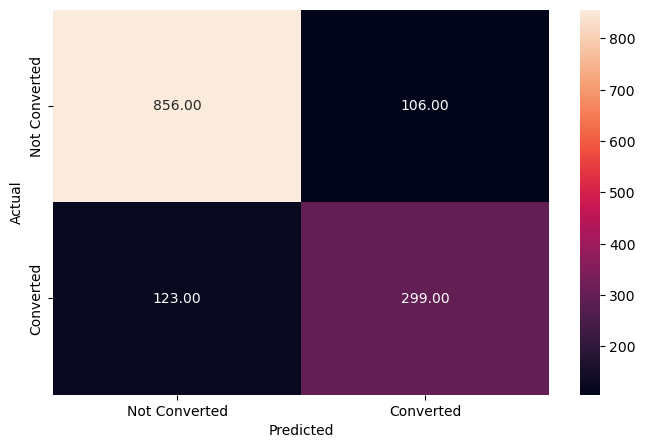

In [33]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
* The model did significantly worse on the testing data (f1-score -30%), it is **overfitted** and does not generalize well. 
* The model is predicting equally on recall(70%) and precision(69%), we would like to prioritize **increasing recall (minimizing false negatives)**. 

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [35]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), #dept [2, 3, 4, 5, 6, 7, 8, 9]
              'criterion': ['gini', 'entropy'], #use both gini and entropy to measure split quality
              'min_samples_leaf': [5, 10, 20, 25] #minimum number of samples to be a leaf node
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search 
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5) #=> chooses the best hyperparameters to use

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



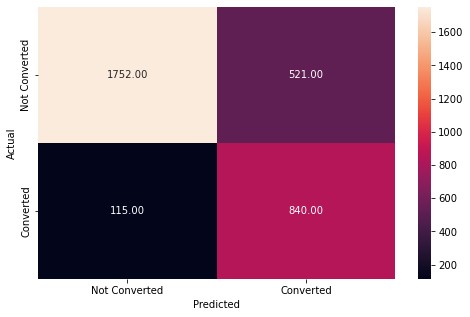

In [34]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_train2)

**Observations:** 
* Tuned Model is doing worse on the training data f1-score of 79%
* That is expected as we have limited its training and are trying to reduce overfitting

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



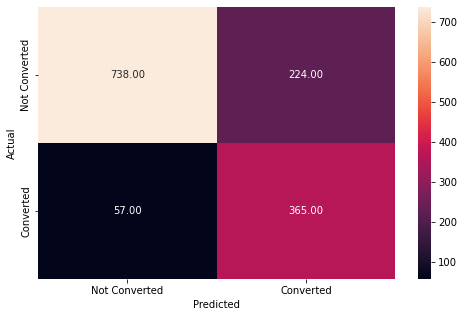

In [35]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

**Observations:**
* The tuned model has an testing f1-score of **72%** and is no longer overfitted and **generalizes well**.
* The model has increased its recall to 86% which is well above precision.
* Would like to increase general accuracy while maintaining similar racall to precision ratio.

**Let's visualize the tuned decision tree** and observe the decision rules:

#### **Visualize The Tree**

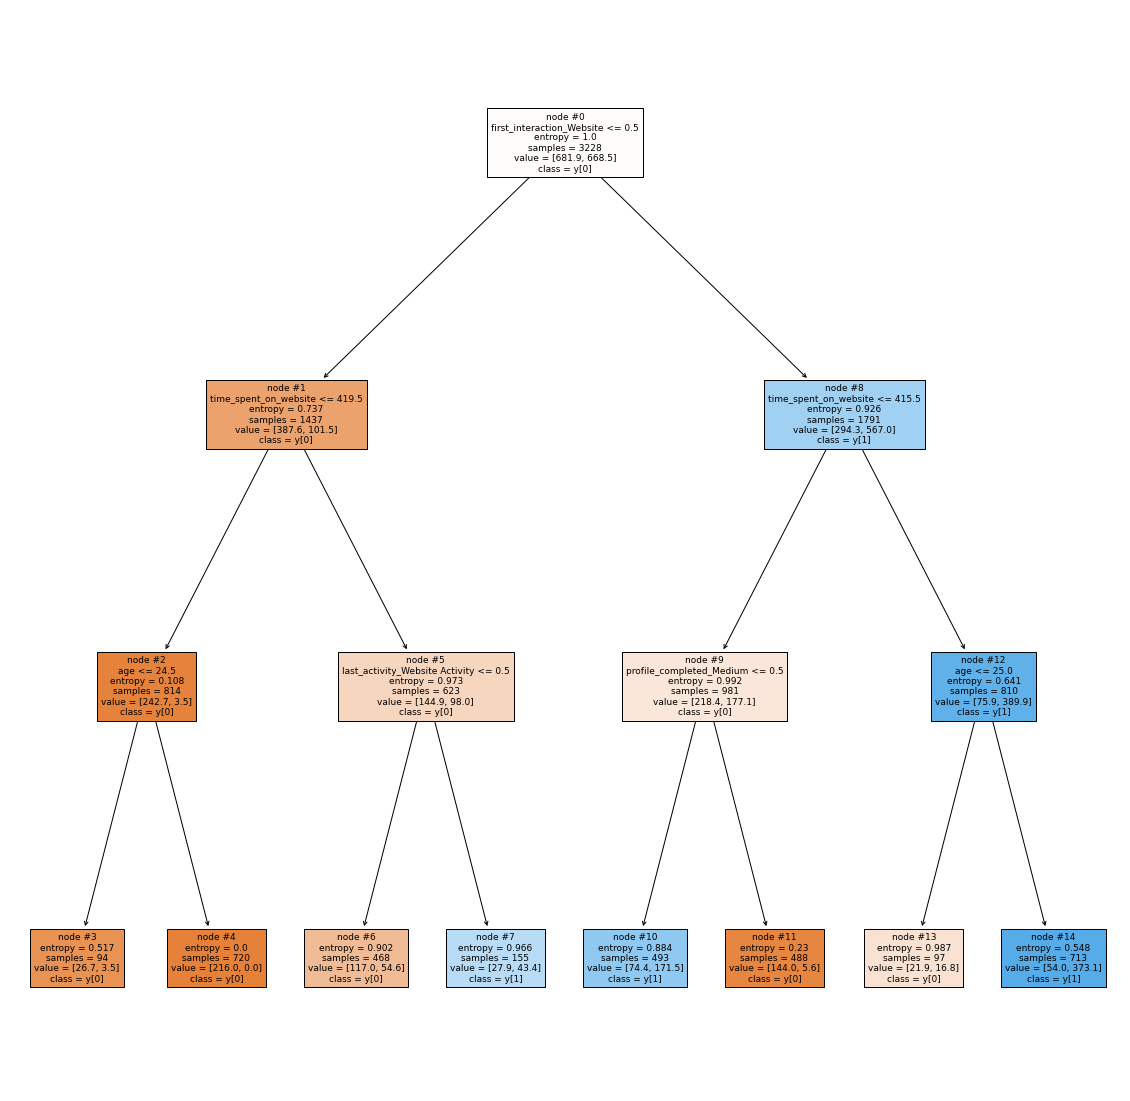

In [36]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
* First split is made on `first_interaction` which implies it is one of the most important features (as observed in EDA). Leads who first interacted with the website versus the app have a much higher conversion rate. 
* Second split is mad on `time_spent_on_website` (highlighted in correlation heatmap). Leads who spend more time on the website have a higher likelyhood of converting.
* Next `age` seems to be the next significant factor, apearing twice. Where leads who are older have a higher likelyhood of converting. 

#### **Feature Importance**

In [37]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


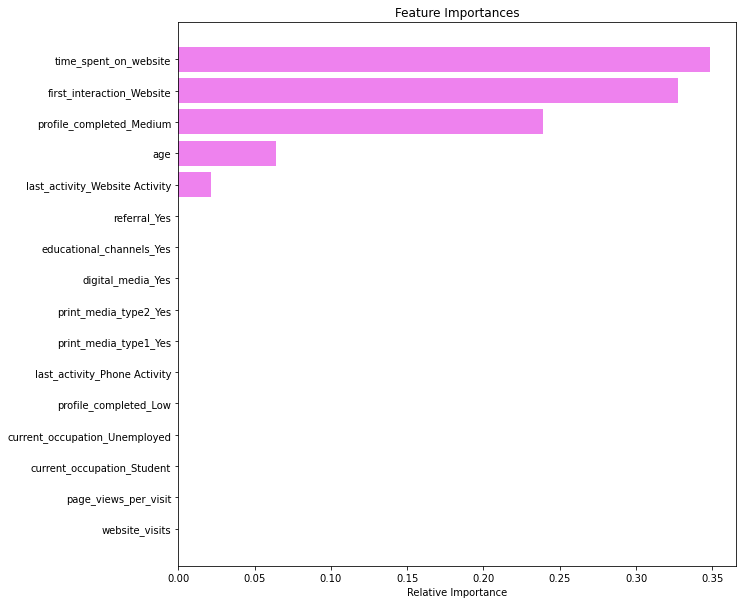

In [38]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and `first_interaction_website` are the most important features** **followed by `profile_completed`, `age`, and `last_activity`**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.
- Interestingly `age` is higher prioritized in the decision tree over `profile_completed`, indicating that there is perhaps overlap in the first 3 factors ability to seperate while `age` measures a slightly different effect.|

### **Random Forest Classifier - Base Model**

In [39]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7,criterion="entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



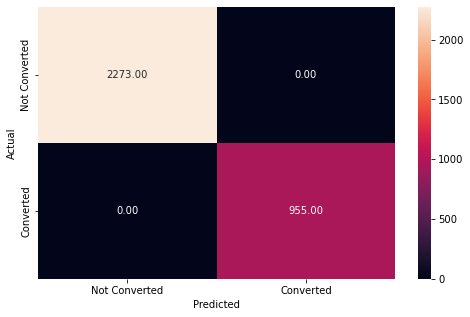

In [40]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



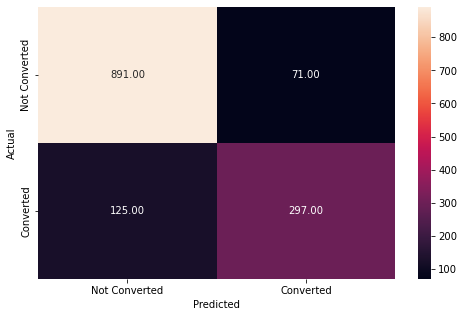

In [41]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
* The model is back to being overfitted, not surprising given we are using a unrestrained random forest. 
* Without any class weight precision is now higher than recall, the opossite of our goal. 

### **Random Forest Classifier - Hyperparameter Tuning Model**

In [42]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [43]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



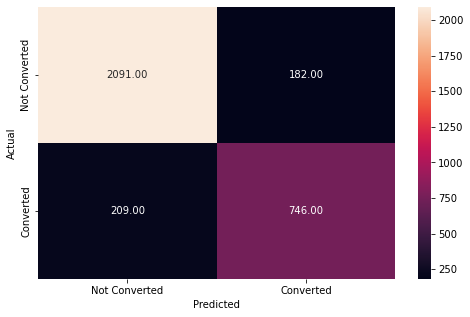

In [44]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.73      0.76       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



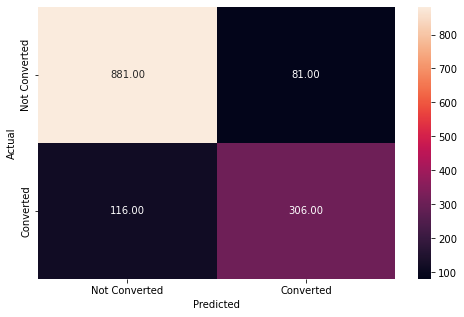

In [45]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations**
* While less than before the model is slightly overfitted (f1-score training 79% to testing 76%). 
* The precision continues to be higher than the recall, something we will need to improve apon to surpass our tuned model. 

* The overall accuracy is slightly higher than that of our tuned model sugesting that using a random forest is the correct option. 

### **Random Forest Classifier - Hyperparameter Tuning Model 2**

Try and increase performance and prioritize recall over precision

In [55]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



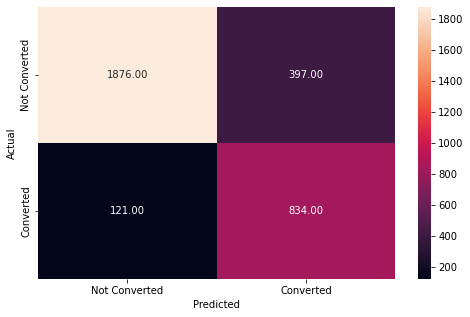

In [57]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



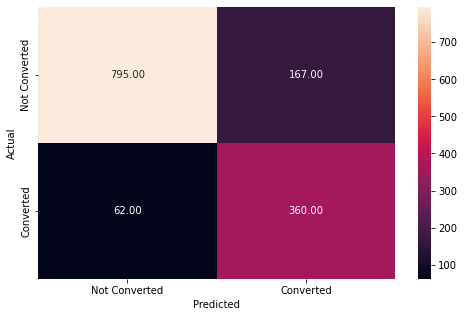

In [58]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* The model is no longer overfitted with a testing **f1-score of 76% (equal to to the training accuracy), meaning it will generalize well.**
* The **recall is near the highest at 85%**, well above the precision of 68%. This is inline with our goals of reducing false negatives. 
    * While the recall of the tuned model is slightly higher at 86%, the model is overall weaker with an f1-score of 72%.

#### **Feature Importance - Random Forest**

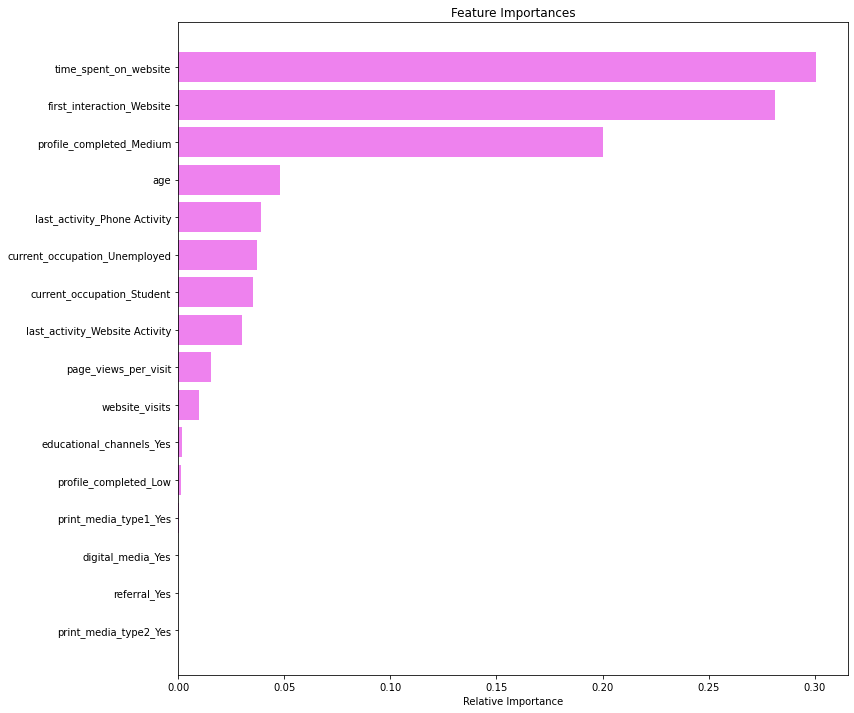

In [59]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Reminder of Objectives**
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.

### **Conclusions:**
We have build decision tree based models that can predict if a lead is likely to be converted to a paid customer.
Two models performed very well:
* Tuned Model - f1-score 72% and recall 86%
* Hyper Tuned Random Forest Model - f1-score 76% and recall 85%

We set out with the goal of maximize recall (minimize false negatives), as loosing a convertable lead is more costly than wasting resources on a non-convertable lead. While both are acceptable for our purpose, wasting resources is still an important enough factor that a 4% overall improvement is likely more important than a 1% recall loss. For that reason it is recomended that we us the **Hyper Tuned Random Forest Model**.
<br><br>

Looking at feature importances, we can say that **time spent on website, first_interaction_website, and profile_completed** are the major drivers of the model. Those features suggest a lead is more likely to be converted when:
* More time is spen on the website
* First interaction is on the website rather than the app
* The profile is completed over a medium level

Age also a factor that perhaps provids insight outside of the above 3, where leads who are older have a higher likelyhood of converting.

### **Business Recommendations**

Time spent on the website was the strongest indicator of converting leads to paid customers
* XonLearn's team should prioritize leads who have shown a higher degree of interest, as measured by time spent on the website, as they are more likely to be converted.

Having a leads first interaction on the website significantly increased the chance of a lead converting when compared to the app. 
* XonLearn prioritize focus on leads using the website and focus on funneling potential leads to the website first. 
* It would also be prudent to review the app to determine why it is not converting leads and improve on it or remove it. 

Leads who completed their profile at a high level where more likely to convert compared to those who had only completed it to a medium level. 
* XonLearn's team can contact those who are at the medium level and encourage/help them to move to the high level. 

Leads who where between 45-55 had a higher chance of converting to paid customers.
* XonLearn can focus their marketing on that age group as it seems to indicate the market base
* XonLearn can also do research into why the younger age group is less interested and if anything can be done to break into that market. 